In [1]:
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [2]:
with open("../datasets/shakespeare.txt") as f:
    shakespeare = f.readlines()

shakespeare

['THE SONNETS\n',
 '\n',
 'by William Shakespeare\n',
 '\n',
 'From fairest creatures we desire increase,\n',
 "That thereby beauty's rose might never die,\n",
 'But as the riper should by time decease,\n',
 'His tender heir might bear his memory:\n',
 'But thou contracted to thine own bright eyes,\n',
 "Feed'st thy light's flame with self-substantial fuel,\n",
 'Making a famine where abundance lies,\n',
 'Thy self thy foe, to thy sweet self too cruel:\n',
 "Thou that art now the world's fresh ornament,\n",
 'And only herald to the gaudy spring,\n',
 'Within thine own bud buriest thy content,\n',
 "And tender churl mak'st waste in niggarding:\n",
 'Pity the world, or else this glutton be,\n',
 "To eat the world's due, by the grave and thee.\n",
 '\n',
 'When forty winters shall besiege thy brow,\n',
 "And dig deep trenches in thy beauty's field,\n",
 "Thy youth's proud livery so gazed on now,\n",
 'Will be a tattered weed of small worth held:  \n',
 'Then being asked, where all thy bea

In [3]:
tokens = text_to_word_sequence(" ".join(shakespeare))
tokens

['the',
 'sonnets',
 'by',
 'william',
 'shakespeare',
 'from',
 'fairest',
 'creatures',
 'we',
 'desire',
 'increase',
 'that',
 'thereby',
 "beauty's",
 'rose',
 'might',
 'never',
 'die',
 'but',
 'as',
 'the',
 'riper',
 'should',
 'by',
 'time',
 'decease',
 'his',
 'tender',
 'heir',
 'might',
 'bear',
 'his',
 'memory',
 'but',
 'thou',
 'contracted',
 'to',
 'thine',
 'own',
 'bright',
 'eyes',
 "feed'st",
 'thy',
 "light's",
 'flame',
 'with',
 'self',
 'substantial',
 'fuel',
 'making',
 'a',
 'famine',
 'where',
 'abundance',
 'lies',
 'thy',
 'self',
 'thy',
 'foe',
 'to',
 'thy',
 'sweet',
 'self',
 'too',
 'cruel',
 'thou',
 'that',
 'art',
 'now',
 'the',
 "world's",
 'fresh',
 'ornament',
 'and',
 'only',
 'herald',
 'to',
 'the',
 'gaudy',
 'spring',
 'within',
 'thine',
 'own',
 'bud',
 'buriest',
 'thy',
 'content',
 'and',
 'tender',
 'churl',
 "mak'st",
 'waste',
 'in',
 'niggarding',
 'pity',
 'the',
 'world',
 'or',
 'else',
 'this',
 'glutton',
 'be',
 'to',
 '

In [4]:
token_cnt = Counter(tokens)
token_cnt

Counter({'and': 490,
         'the': 432,
         'to': 414,
         'my': 393,
         'of': 370,
         'i': 341,
         'in': 323,
         'that': 322,
         'thy': 287,
         'thou': 234,
         'with': 181,
         'for': 171,
         'is': 168,
         'love': 167,
         'not': 166,
         'a': 164,
         'me': 164,
         'but': 163,
         'thee': 162,
         'so': 145,
         'be': 142,
         'as': 121,
         'all': 120,
         'it': 111,
         'you': 111,
         'which': 108,
         'his': 107,
         'when': 106,
         'this': 104,
         'your': 100,
         'by': 94,
         'doth': 88,
         'self': 87,
         'do': 84,
         'from': 82,
         'on': 80,
         'or': 79,
         'no': 79,
         'have': 76,
         'then': 74,
         'what': 70,
         'are': 69,
         'if': 68,
         'more': 64,
         'mine': 63,
         'their': 63,
         'shall': 59,
         'will': 59,
       

In [5]:
token_df = pd.DataFrame.from_dict(token_cnt, orient="index", columns=["freq"])
token_df.index.name = "token"
token_df.sort_values(by="freq", ascending=False, inplace=True)
token_df

,freq
token,
and,490
the,432
to,414
my,393
of,370
...,...
enmity,1
oblivious,1
war's,1


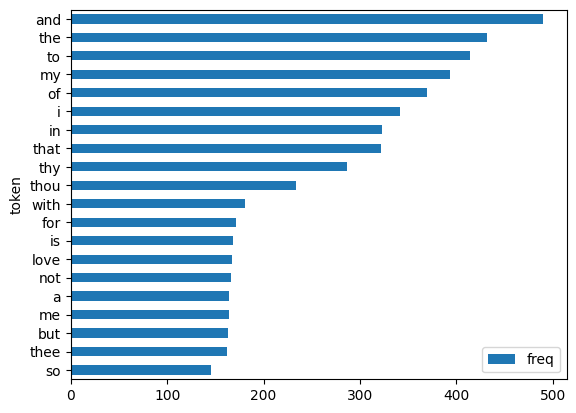

In [6]:
ax = token_df.head(20).plot(kind="barh")
ax.invert_yaxis()

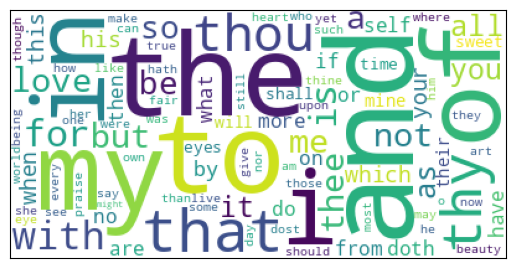

In [7]:
cloud = WordCloud(background_color="white", max_words=100)
visual = cloud.fit_words(token_cnt)

plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)

plt.imshow(visual.to_image())